In [214]:
import numpy as np
import pandas as pd
import scipy as sc

In [215]:
#### Create mock dataset (mmock cluster assignments as per the end of the EM algorithm)
n=100
gamma_m = {}
gamma_m[1]  = np.ones(n)
for k in range(2, 10):
    gamma_m[k]  = np.random.dirichlet(alpha = np.random.uniform(size=k) ,size=n)


In [216]:
#### Product alignment

#D = 1 - sc.spatial.distance.cdist(gamma_m.T, gamma_mp1.T, 'cosine')
D = {}
W = {}
k=2
D[k] = gamma_m[k-1].T @ gamma_m[k]
W[k] = 1./np.sum(D[k])  *  D[k]
for k in range(3, 10):
    D[k] = gamma_m[k-1].T @ gamma_m[k]
    #### Align the clusters
    W[k] = np.diag(1./D[k].sum(axis=1)) @ D[k]
    
#Dmm1 = 1 - sc.spatial.distance.cdist(gamma_mm1.T, gamma_m.T, 'cosine')
#Dm = 1 - sc.spatial.distance.cdist(gamma_m.T, gamma_mp1.T, 'cosine')

In [217]:
node_labels

{0: 'Cluster 1, K=1',
 1: 'Cluster 1, K=2',
 2: 'Cluster 2, K=2',
 3: 'Cluster 1, K =3',
 4: 'Cluster 2, K =3',
 5: 'Cluster 3, K =3',
 6: 'Cluster 1, K =4',
 7: 'Cluster 2, K =4',
 8: 'Cluster 3, K =4',
 9: 'Cluster 4, K =4',
 10: 'Cluster 1, K =5',
 11: 'Cluster 2, K =5',
 12: 'Cluster 3, K =5',
 13: 'Cluster 4, K =5',
 14: 'Cluster 5, K =5',
 15: 'Cluster 1, K =6',
 16: 'Cluster 2, K =6',
 17: 'Cluster 3, K =6',
 18: 'Cluster 4, K =6',
 19: 'Cluster 5, K =6',
 20: 'Cluster 6, K =6',
 21: 'Cluster 1, K =7',
 22: 'Cluster 2, K =7',
 23: 'Cluster 3, K =7',
 24: 'Cluster 4, K =7',
 25: 'Cluster 5, K =7',
 26: 'Cluster 6, K =7',
 27: 'Cluster 7, K =7',
 28: 'Cluster 1, K =8',
 29: 'Cluster 2, K =8',
 30: 'Cluster 3, K =8',
 31: 'Cluster 4, K =8',
 32: 'Cluster 5, K =8',
 33: 'Cluster 6, K =8',
 34: 'Cluster 7, K =8',
 35: 'Cluster 8, K =8',
 36: 'Cluster 1, K =9',
 37: 'Cluster 2, K =9',
 38: 'Cluster 3, K =9',
 39: 'Cluster 4, K =9',
 40: 'Cluster 5, K =9',
 41: 'Cluster 6, K =9',
 42: 

In [218]:
W[3].sum(axis=0)

array([0.42931917, 1.27382558, 0.29685525])

In [219]:
import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
pyo.init_notebook_mode()
# Example row-stochastic matrix W (5 x 5 for illustration)

# Prepare the data for the Sankey diagram
n = Dm.shape[0]
np1 = Dm.shape[1]
sources = []
targets = []
values = []

K = 10

    
sources.append(0)
targets.append(1)
values.append(W[2][0])

sources.append(0)
targets.append(2)
values.append(W[2][1])
node_labels = ['Cluster 1, K=1' , 'Cluster 1, K=2', 'Cluster 2, K=2']  
for k in range(3, K):
    for j in range(k):
        node_labels +=  ['Cluster '+ str( j + 1) +   ', K =' + str(k) ]
a = 1
for k in range(3, K-1):
    for i in np.arange(k-1):
        ### compute new permut:
        for j in np.arange(k):
            print([i, j, a + i, a + j + k-1])
            sources.append(a + i)
            targets.append( a + j + k-1 )  # Shift column indices to avoid overlap with row indices
            values.append(W[k][i, j])
            
            
    a += k-1


box_size = [1, W[2][0], W[2][1]]


for k in range(3, K):
    box_size += list(W[k].sum(axis=0))
# Define node labels
#node_labels = [f'Row {i}' for i in range(n)] + [f'Col {j}' for j in range(np1)]

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,#[20 + size * 10 for size in box_size],
        line=dict(color="black", width=0.5),
        customdata  = box_size,
        label=node_labels
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
)])

fig.update_layout(title_text="Sankey Diagram of Row-Stochastic Matrix W", font_size=10)
fig.show()
fig.write_html('first_figure.html', auto_open=True)

[0, 0, 1, 3]
[0, 1, 1, 4]
[0, 2, 1, 5]
[1, 0, 2, 3]
[1, 1, 2, 4]
[1, 2, 2, 5]
[0, 0, 3, 6]
[0, 1, 3, 7]
[0, 2, 3, 8]
[0, 3, 3, 9]
[1, 0, 4, 6]
[1, 1, 4, 7]
[1, 2, 4, 8]
[1, 3, 4, 9]
[2, 0, 5, 6]
[2, 1, 5, 7]
[2, 2, 5, 8]
[2, 3, 5, 9]
[0, 0, 6, 10]
[0, 1, 6, 11]
[0, 2, 6, 12]
[0, 3, 6, 13]
[0, 4, 6, 14]
[1, 0, 7, 10]
[1, 1, 7, 11]
[1, 2, 7, 12]
[1, 3, 7, 13]
[1, 4, 7, 14]
[2, 0, 8, 10]
[2, 1, 8, 11]
[2, 2, 8, 12]
[2, 3, 8, 13]
[2, 4, 8, 14]
[3, 0, 9, 10]
[3, 1, 9, 11]
[3, 2, 9, 12]
[3, 3, 9, 13]
[3, 4, 9, 14]
[0, 0, 10, 15]
[0, 1, 10, 16]
[0, 2, 10, 17]
[0, 3, 10, 18]
[0, 4, 10, 19]
[0, 5, 10, 20]
[1, 0, 11, 15]
[1, 1, 11, 16]
[1, 2, 11, 17]
[1, 3, 11, 18]
[1, 4, 11, 19]
[1, 5, 11, 20]
[2, 0, 12, 15]
[2, 1, 12, 16]
[2, 2, 12, 17]
[2, 3, 12, 18]
[2, 4, 12, 19]
[2, 5, 12, 20]
[3, 0, 13, 15]
[3, 1, 13, 16]
[3, 2, 13, 17]
[3, 3, 13, 18]
[3, 4, 13, 19]
[3, 5, 13, 20]
[4, 0, 14, 15]
[4, 1, 14, 16]
[4, 2, 14, 17]
[4, 3, 14, 18]
[4, 4, 14, 19]
[4, 5, 14, 20]
[0, 0, 15, 21]
[0, 1, 15, 22]
[0, 2,

[0.47248779 0.52751221]
[0.51107536 0.48892464]
[0.49226369 0.50773631]
[0.40318909 0.29583095 0.30097996]
[0.30400566 0.33393539 0.36205895]
[0.31945034 0.3546032  0.32594646]
[0.34179159 0.33609285 0.32211556]
[0.06839232 0.16619551 0.40710391 0.35830826]
[0.25090021 0.23026552 0.2481257  0.27070857]
[0.27918742 0.22572805 0.23226895 0.26281559]
[0.19581723 0.24842941 0.25826369 0.29748967]
[0.23371297 0.30051292 0.26571649 0.20005763]
[0.15064379 0.24739591 0.214806   0.1612519  0.22590239]
[8.59785783e-07 7.63714440e-01 1.90776786e-01 1.29152852e-03
 4.42163859e-02]
[0.14858438 0.17079282 0.20030483 0.26154887 0.21876911]
[0.22636819 0.16118757 0.19907442 0.20004039 0.21332943]
[0.14040061 0.3014872  0.18348503 0.22101959 0.15360758]
[0.26362124 0.19193298 0.19885334 0.16750135 0.17809109]
[0.11655091 0.38450449 0.14407588 0.09997375 0.11906324 0.13583174]
[0.22960285 0.31096089 0.124303   0.13910011 0.07635561 0.11967754]
[0.16673896 0.10976902 0.18411562 0.17701635 0.20085058 0.1

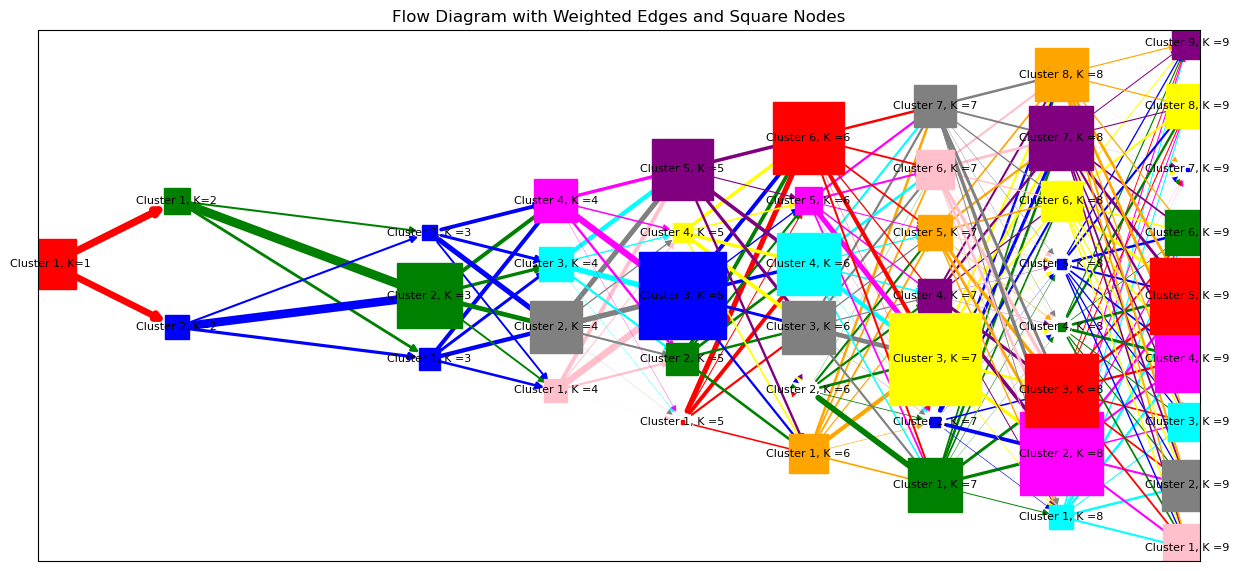

In [220]:
# Finding maximum weight neighbor for each node

import matplotlib.patches as patches
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import cycle

# Create the directed graph
G = nx.DiGraph()

# Add nodes with labels

K = 10
node_labels = {0: 'Cluster 1, K=1' , 
               1 : 'Cluster 1, K=2', 
               2: 'Cluster 2, K=2'}  
pos = {0: (0, 0)}
pos.update({1: (100, 50)})
pos.update({2: (100, -50)})
node_size = {0: 1,
             1: W[2][0],
             2: W[2][1]}
a = 3
for k in range(3, K):
    for j in range(k):
        node_labels.update({ a+j: 'Cluster '+ str( j + 1) +   ', K =' + str(k) })
        pos.update({a+j: (k*100, float(j - k/2 )/2.0 * 100)})
    a += k
box_size = [1, W[2][0], W[2][1]]
for k in range(3, K):
    box_size += list(W[k].sum(axis=0))
node_size = { k: v for k, v in enumerate(box_size)}


G.add_nodes_from(node_labels.keys())
G.add_edge(0, 1, weight=W[2][0])
G.add_edge(0, 2, weight=W[2][1])

a = 1
for k in range(3, K):
    for i in np.arange(k-1):
        for j in np.arange(k):
            #print([i, j, a + i, a + j + k-1])
            G.add_edge(a + i, a + j + k-1, weight=W[k][i, j])         
    a += k-1
    
# Manually set positions for nodes
# Define colors, cycling if there are more nodes than colors
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'pink', 'grey', 'cyan', 'magenta']
color_cycle = cycle(colors)  # Create a cycle iterator
node_colors = [next(color_cycle) for _ in range(nx.number_of_nodes(G))]
### Assign colors based on the majority cluster
a = 1
for k in range(3, 10):
    for j in range(k):
        prop = W[k][:,j]/np.sum(W[k][:,j])
        print(prop)
        max_neighbours = np.argmax(W[k][:,j])
        if prop[max_neighbours] > 0.5:
            node_colors[a + j+ k-1] = node_colors[a + max_neighbours]
    a+= k-1
    

# Calculating maximum weight edge color for each edge
edge_colors = []
for i, j, data in G.edges(data=True):
    #print([i, j, data])
    # Use the color of the node that 'i' has the maximum weight edge with
    edge_color = node_colors[i]
    edge_colors.append(edge_color)


# max_weight_neighbor_color = {}
# a = 1
# e = 2
# for k in range(3, K):
#     for j in range(k):
#         max_weight = 0
#         max_neighbor = None
#         for i in range(k-1):
#             if W[k][i,j]  > max_weight:
#                 max_weight = W[k][i,j]
#                 max_neighbor = a + i
#         node = a + j + k-1
#         if max_neighbor is not None:
#             max_weight_neighbor_color[e] = node_colors[max_neighbor]
#         #print([node, max_neighbor, max_weight_neighbor_color[node]])
#         e += 1
#     a += k-1



plt.figure(figsize=(15, 10))  # Set the figure size to 15 inches wide
edges = G.edges(data=True)
edge_widths = [d['weight']*10 for (u, v, d) in edges]
#nx.draw_networkx_edges(G, pos, width=edge_widths)
# Draw edges
e = 0
for i, j, data in G.edges(data=True):
    nx.draw_networkx_edges(G, pos, edgelist=[(i, j)], width=edge_widths[e],
                           edge_color=edge_colors[e])
    e+=1




# Draw custom square nodes
scale_factor=4000
ax = plt.gca()
for node in G.nodes:
    size = node_size[node] * scale_factor
    color = node_colors[node]
    square = patches.Rectangle((pos[node][0] - size / 200, pos[node][1] - size / 200), size / 100, size / 100, 
                               angle=0.0, color = color)
    ax.add_patch(square)
    ax.text(pos[node][0], pos[node][1], node_labels[node], horizontalalignment='center', verticalalignment='center', fontsize=8)

plt.title('Flow Diagram with Weighted Edges and Square Nodes')
ax.set_xlim(min(x for x, y in pos.values()) - 10, max(x for x, y in pos.values()) + 10)
ax.set_ylim(min(y for x, y in pos.values()) - 10, max(y for x, y in pos.values()) + 10)
ax.set_aspect('equal')
plt.grid(False)
plt.show()





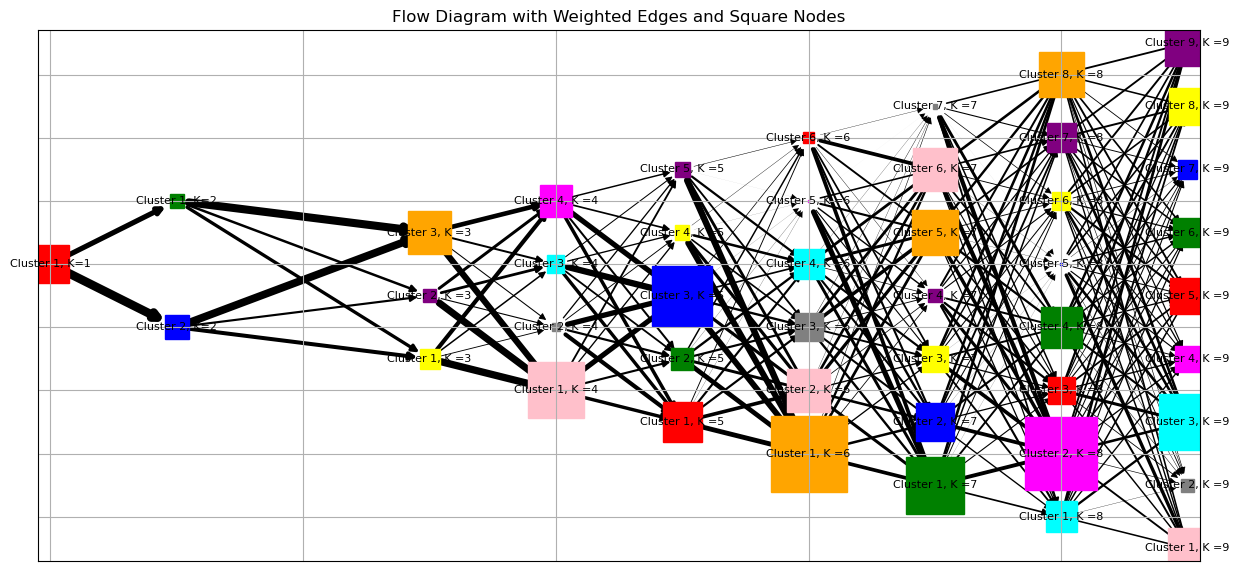

In [176]:
import matplotlib.patches as patches
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import cycle

# Create the directed graph
G = nx.DiGraph()

# Add nodes with labels

K = 10
node_labels = {0: 'Cluster 1, K=1' , 
               1 : 'Cluster 1, K=2', 
               2: 'Cluster 2, K=2'}  
pos = {0: (0, 0)}
pos.update({1: (100, 50)})
pos.update({2: (100, -50)})
node_size = {0: 1,
             1: W[2][0],
             2: W[2][1]}
a = 3
for k in range(3, K):
    for j in range(k):
        node_labels.update({ a+j: 'Cluster '+ str( j + 1) +   ', K =' + str(k) })
        pos.update({a+j: (k*100, float(j - k/2 )/2.0 * 100)})
    a += k
box_size = [1, W[2][0], W[2][1]]
for k in range(3, K):
    box_size += list(W[k].sum(axis=0))
node_size = { k: v for k, v in enumerate(box_size)}


G.add_nodes_from(node_labels.keys())
G.add_edge(0, 1, weight=W[2][0])
G.add_edge(0, 2, weight=W[2][1])

a = 1
for k in range(3, K):
    for i in np.arange(k-1):
        for j in np.arange(k):
            #print([i, j, a + i, a + j + k-1])
            G.add_edge(a + i, a + j + k-1, weight=W[k][i, j])         
    a += k-1
    
# Manually set positions for nodes
plt.figure(figsize=(15, 10))  # Set the figure size to 15 inches wide
edges = G.edges(data=True)
edge_widths = [d['weight']*10 for (u, v, d) in edges]
nx.draw_networkx_edges(G, pos, width=edge_widths)


# Define colors, cycling if there are more nodes than colors
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'pink', 'grey', 'cyan', 'magenta']
color_cycle = cycle(colors)  # Create a cycle iterator
node_colors = [next(color_cycle) for _ in range(nx.number_of_nodes(G))]

# Draw custom square nodes
scale_factor=3000


ax = plt.gca()
for node in G.nodes:
    size = node_size[node] * scale_factor
    color = node_colors[node]
    square = patches.Rectangle((pos[node][0] - size / 200, pos[node][1] - size / 200), size / 100, size / 100, 
                               angle=0.0, color = color)
    ax.add_patch(square)
    ax.text(pos[node][0], pos[node][1], node_labels[node], horizontalalignment='center', verticalalignment='center', fontsize=8)

plt.title('Flow Diagram with Weighted Edges and Square Nodes')
ax.set_xlim(min(x for x, y in pos.values()) - 10, max(x for x, y in pos.values()) + 10)
ax.set_ylim(min(y for x, y in pos.values()) - 10, max(y for x, y in pos.values()) + 10)
ax.set_aspect('equal')
plt.grid(True)
plt.show()

In [173]:
node_colors

['red',
 'green',
 'blue',
 'yellow',
 'purple',
 'orange',
 'pink',
 'grey',
 'cyan',
 'magenta',
 'red',
 'green',
 'blue',
 'yellow',
 'purple',
 'orange',
 'pink',
 'grey',
 'cyan',
 'magenta',
 'red',
 'green',
 'blue',
 'yellow',
 'purple',
 'orange',
 'pink',
 'grey',
 'cyan',
 'magenta',
 'red',
 'green',
 'blue',
 'yellow',
 'purple',
 'orange',
 'pink',
 'grey',
 'cyan',
 'magenta',
 'red',
 'green',
 'blue',
 'yellow',
 'purple']

In [202]:
np.argmax(W[4][:,1])

1

In [208]:
W[4][:,0]

array([0.52560219, 0.50560771, 0.44844495])

[0.45215106 0.54784894]
[0.53734676 0.46265324]
[0.51117034 0.48882966]
[0.35521945 0.34170652 0.30307403]
[0.29175812 0.36210394 0.34613794]
[0.24405853 0.44150417 0.3144373 ]
[0.35362675 0.25343221 0.39294104]
[0.23705814 0.28867083 0.23305052 0.24122052]
[0.26082878 0.2705756  0.22283676 0.24575886]
[0.2342755  0.24075819 0.28719518 0.23777113]
[0.25244565 0.17293106 0.25356158 0.32106171]
[0.32659713 0.22963952 0.1836881  0.26007524]
[0.17424689 0.16995407 0.21005708 0.21620187 0.22954009]
[0.22896077 0.18593703 0.20165408 0.20270077 0.18074735]
[0.2126696  0.21358096 0.22795135 0.16300381 0.18279428]
[0.1956602  0.2130972  0.1542822  0.23214743 0.20481297]
[0.30074894 0.32554097 0.17891032 0.14211972 0.05268005]
[0.22810071 0.37467509 0.1805747  0.09202588 0.12462362]
[0.17540172 0.14473866 0.11176095 0.14165379 0.24854917 0.17789571]
[0.1835336  0.18888219 0.14796071 0.15356784 0.17430579 0.15174987]
[0.13625755 0.14292223 0.19852244 0.22569116 0.11427587 0.18233076]
[0.16174454 

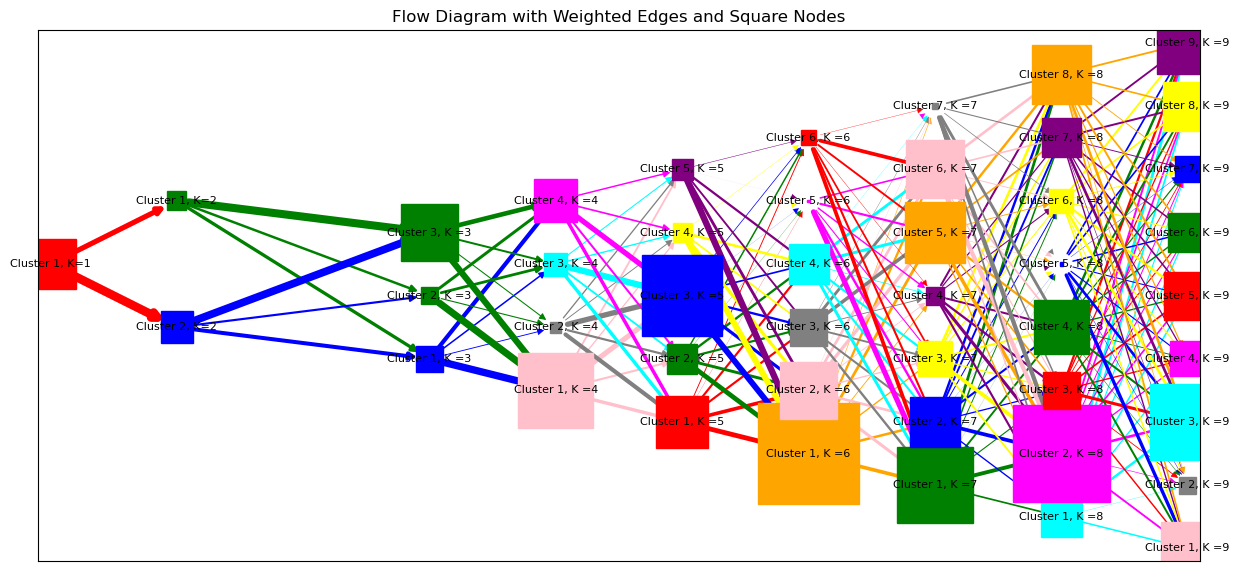

In [213]:
# Finding maximum weight neighbor for each node

import matplotlib.patches as patches
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import cycle

# Create the directed graph
G = nx.DiGraph()

# Add nodes with labels

K = 10
node_labels = {0: 'Cluster 1, K=1' , 
               1 : 'Cluster 1, K=2', 
               2: 'Cluster 2, K=2'}  
pos = {0: (0, 0)}
pos.update({1: (100, 50)})
pos.update({2: (100, -50)})
node_size = {0: 1,
             1: W[2][0],
             2: W[2][1]}
a = 3
for k in range(3, K):
    for j in range(k):
        node_labels.update({ a+j: 'Cluster '+ str( j + 1) +   ', K =' + str(k) })
        pos.update({a+j: (k*100, float(j - k/2 )/2.0 * 100)})
    a += k
box_size = [1, W[2][0], W[2][1]]
for k in range(3, K):
    box_size += list(W[k].sum(axis=0))
node_size = { k: v for k, v in enumerate(box_size)}


G.add_nodes_from(node_labels.keys())
G.add_edge(0, 1, weight=W[2][0])
G.add_edge(0, 2, weight=W[2][1])

a = 1
for k in range(3, K):
    for i in np.arange(k-1):
        for j in np.arange(k):
            #print([i, j, a + i, a + j + k-1])
            G.add_edge(a + i, a + j + k-1, weight=W[k][i, j])         
    a += k-1
    
# Manually set positions for nodes
# Define colors, cycling if there are more nodes than colors
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'pink', 'grey', 'cyan', 'magenta']
color_cycle = cycle(colors)  # Create a cycle iterator
node_colors = [next(color_cycle) for _ in range(nx.number_of_nodes(G))]
### Assign colors based on the majority cluster
a = 1
for k in range(3, 10):
    for j in range(k):
        prop = W[k][:,j]/np.sum(W[k][:,j])
        print(prop)
        max_neighbours = np.argmax(W[k][:,j])
        if prop[max_neighbours] > 0.5:
            node_colors[a + j+ k-1] = node_colors[a + max_neighbours]
    a+= k-1
    

# Calculating maximum weight edge color for each edge
edge_colors = []
for i, j, data in G.edges(data=True):
    #print([i, j, data])
    # Use the color of the node that 'i' has the maximum weight edge with
    edge_color = node_colors[i]
    edge_colors.append(edge_color)


# max_weight_neighbor_color = {}
# a = 1
# e = 2
# for k in range(3, K):
#     for j in range(k):
#         max_weight = 0
#         max_neighbor = None
#         for i in range(k-1):
#             if W[k][i,j]  > max_weight:
#                 max_weight = W[k][i,j]
#                 max_neighbor = a + i
#         node = a + j + k-1
#         if max_neighbor is not None:
#             max_weight_neighbor_color[e] = node_colors[max_neighbor]
#         #print([node, max_neighbor, max_weight_neighbor_color[node]])
#         e += 1
#     a += k-1



plt.figure(figsize=(15, 10))  # Set the figure size to 15 inches wide
edges = G.edges(data=True)
edge_widths = [d['weight']*10 for (u, v, d) in edges]
#nx.draw_networkx_edges(G, pos, width=edge_widths)
# Draw edges
e = 0
for i, j, data in G.edges(data=True):
    nx.draw_networkx_edges(G, pos, edgelist=[(i, j)], width=edge_widths[e],
                           edge_color=edge_colors[e])
    e+=1




# Draw custom square nodes
scale_factor=4000
ax = plt.gca()
for node in G.nodes:
    size = node_size[node] * scale_factor
    color = node_colors[node]
    square = patches.Rectangle((pos[node][0] - size / 200, pos[node][1] - size / 200), size / 100, size / 100, 
                               angle=0.0, color = color)
    ax.add_patch(square)
    ax.text(pos[node][0], pos[node][1], node_labels[node], horizontalalignment='center', verticalalignment='center', fontsize=8)

plt.title('Flow Diagram with Weighted Edges and Square Nodes')
ax.set_xlim(min(x for x, y in pos.values()) - 10, max(x for x, y in pos.values()) + 10)
ax.set_ylim(min(y for x, y in pos.values()) - 10, max(y for x, y in pos.values()) + 10)
ax.set_aspect('equal')
plt.grid(False)
plt.show()





In [194]:
edge_colors

['red',
 'red',
 'green',
 'green',
 'green',
 'blue',
 'blue',
 'blue',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'purple',
 'purple',
 'purple',
 'purple',
 'orange',
 'orange',
 'orange',
 'orange',
 'pink',
 'pink',
 'pink',
 'pink',
 'pink',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'cyan',
 'cyan',
 'cyan',
 'cyan',
 'cyan',
 'magenta',
 'magenta',
 'magenta',
 'magenta',
 'magenta',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'pink',
 'pink',
 'pink',
 'pink',
 'pink',
 'pink',
 'pink',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'cyan',
 'cyan',
 'cyan',
 'cyan',
 'cyan',
 'cyan',
 'cyan',
 'magenta',
 'magenta',
 'magenta',
 'ma

/var/folders/5d/vnx7yths3n3f_d7862mdryz80000gn/T/ipykernel_82744/3162277038.py:3: DeprecationWarning:

`alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.



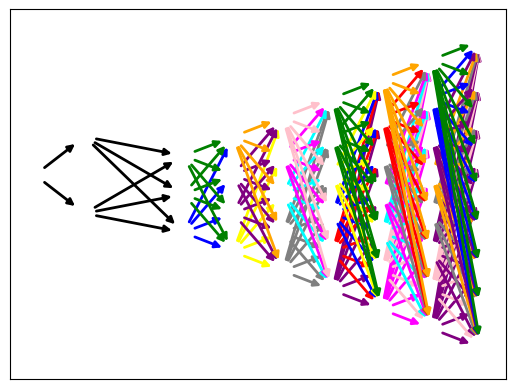

In [98]:
k =3
a = 1
for i in np.arange(k-1):
        for j in np.arange(k):
            print([i, j, a + i, a + j + k-1])

[0, 0, 1, 3]
[0, 1, 1, 4]
[0, 2, 1, 5]
[1, 0, 2, 3]
[1, 1, 2, 4]
[1, 2, 2, 5]


In [94]:
np.vstack([sources, targets])

array([[ 0,  0,  1,  1,  1,  2,  2,  2,  4,  4,  4,  4,  5,  5,  5,  5,
         6,  6,  6,  6,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10, 10,
        10, 10, 10, 11, 11, 11, 11, 11, 13, 13, 13, 13, 13, 13, 14, 14,
        14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16,
        17, 17, 17, 17, 17, 17, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20,
        20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22,
        22, 22, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24,
        26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27,
        28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29,
        30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31,
        32, 32, 32, 32, 32, 32, 32, 32],
       [ 1,  2,  4,  5,  6,  4,  5,  6,  8,  9, 10, 11,  8,  9, 10, 11,
         8,  9, 10, 11, 13, 14, 15, 16, 17, 13, 14, 15, 16, 17, 13, 14,
        15, 16, 17, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 19, 20,
        21, 22, 23, 24,

In [89]:
node_labels

['Cluster 1, K=1',
 'Cluster 1, K=2',
 'Cluster 2, K=2',
 'Cluster 1, K =3',
 'Cluster 2, K =3',
 'Cluster 3, K =3',
 'Cluster 1, K =4',
 'Cluster 2, K =4',
 'Cluster 3, K =4',
 'Cluster 4, K =4',
 'Cluster 1, K =5',
 'Cluster 2, K =5',
 'Cluster 3, K =5',
 'Cluster 4, K =5',
 'Cluster 5, K =5',
 'Cluster 1, K =6',
 'Cluster 2, K =6',
 'Cluster 3, K =6',
 'Cluster 4, K =6',
 'Cluster 5, K =6',
 'Cluster 6, K =6',
 'Cluster 1, K =7',
 'Cluster 2, K =7',
 'Cluster 3, K =7',
 'Cluster 4, K =7',
 'Cluster 5, K =7',
 'Cluster 6, K =7',
 'Cluster 7, K =7',
 'Cluster 1, K =8',
 'Cluster 2, K =8',
 'Cluster 3, K =8',
 'Cluster 4, K =8',
 'Cluster 5, K =8',
 'Cluster 6, K =8',
 'Cluster 7, K =8',
 'Cluster 8, K =8',
 'Cluster 1, K =9',
 'Cluster 2, K =9',
 'Cluster 3, K =9',
 'Cluster 4, K =9',
 'Cluster 5, K =9',
 'Cluster 6, K =9',
 'Cluster 7, K =9',
 'Cluster 8, K =9',
 'Cluster 9, K =9']

In [9]:
fig

In [9]:
fig

In [12]:
# Import the necessaries libraries
import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
pyo.init_notebook_mode()

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["A1", "A2", "B1", "B2", "C1", "C2"],
      color = "blue"
    ),
    link = dict(
      source = [0, 1, 0, 2, 3, 3], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = [2, 3, 3, 4, 4, 5],
      value = [8, 4, 2, 8, 4, 2]
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()